In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
# Extraccion de precios historicos en un rango determinado
disney = yf.download(tickers = 'dis', start = '2023-01-01', end = '2023-03-31', rounding = True)
# Si las columnas tienen múltiples niveles, elimínalos
if isinstance(disney.columns, pd.MultiIndex):
    disney.columns = disney.columns.droplevel(1)

# Resetear el índice para tener la fecha como columna
disney = disney.reset_index()

# Agregar columna de ticker (opcional pero útil si manejas varios)
disney['Ticker'] = 'DIS'

# Volver a agregar la fecha como indice
disney = disney.set_index('Date')

[*********************100%***********************]  1 of 1 completed


In [5]:
disney

Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2023-01-03,87.51,88.49,86.39,87.52,14997100,DIS
2023-01-04,90.47,91.23,87.89,88.52,14957200,DIS
2023-01-05,90.41,90.96,89.03,90.16,11622600,DIS
2023-01-06,92.38,93.14,89.82,91.14,9828100,DIS
2023-01-09,93.22,94.13,91.92,92.88,11675800,DIS
...,...,...,...,...,...,...
2023-03-24,92.54,93.44,91.49,93.26,9534600,DIS
2023-03-27,94.05,94.45,92.83,93.23,7487900,DIS
2023-03-28,93.27,94.43,93.04,93.94,5426100,DIS


In [7]:
disney = disney['Close']
disney

Date
2023-01-03    87.51
2023-01-04    90.47
2023-01-05    90.41
2023-01-06    92.38
2023-01-09    93.22
              ...  
2023-03-24    92.54
2023-03-27    94.05
2023-03-28    93.27
2023-03-29    95.28
2023-03-30    96.49
Name: Close, Length: 61, dtype: float64

In [9]:
disney.index = pd.to_datetime(disney.index)
len_train = int(len(disney)*0.7)
len_train

42

In [11]:
len_test = int(len(disney)*0.3)
len_test

18

In [66]:
# Definicion de grupos de prueba y entrenamiento
train = disney[0 : len_train]
train

Date
2023-01-03     87.51
2023-01-04     90.47
2023-01-05     90.41
2023-01-06     92.38
2023-01-09     93.22
2023-01-10     93.99
2023-01-11     94.75
2023-01-12     98.17
2023-01-13     97.77
2023-01-17     98.27
2023-01-18     97.42
2023-01-19     97.46
2023-01-20    101.78
2023-01-23    103.96
2023-01-24    104.26
2023-01-25    106.35
2023-01-26    107.90
2023-01-27    107.74
2023-01-30    105.83
2023-01-31    106.71
2023-02-01    107.60
2023-02-02    111.35
2023-02-03    108.89
2023-02-06    108.07
2023-02-07    109.80
2023-02-08    109.95
2023-02-09    108.55
2023-02-10    106.29
2023-02-13    105.89
2023-02-14    105.89
2023-02-15    107.45
2023-02-16    104.09
2023-02-17    103.49
2023-02-21    100.42
2023-02-22    100.01
2023-02-23    100.06
2023-02-24     98.66
2023-02-27     98.80
2023-02-28     97.98
2023-03-01     96.92
2023-03-02     97.30
2023-03-03     99.48
Name: Close, dtype: float64

In [68]:
test = disney[len_train:]
test

Date
2023-03-06    99.01
2023-03-07    97.44
2023-03-08    97.67
2023-03-09    94.56
2023-03-10    92.04
2023-03-13    91.08
2023-03-14    91.83
2023-03-15    91.57
2023-03-16    92.74
2023-03-17    91.67
2023-03-20    92.68
2023-03-21    94.96
2023-03-22    93.34
2023-03-23    94.26
2023-03-24    92.54
2023-03-27    94.05
2023-03-28    93.27
2023-03-29    95.28
2023-03-30    96.49
Name: Close, dtype: float64

[ 1.00000000e+00  8.93444733e-01  8.00593575e-01  7.00685532e-01
  6.16642442e-01  5.20406058e-01  4.09558072e-01  2.95655737e-01
  2.14343814e-01  1.15803828e-01 -2.29224565e-04 -1.11440258e-01
 -2.24132569e-01 -3.01275349e-01 -3.59996187e-01 -4.17980944e-01
 -4.41465961e-01]


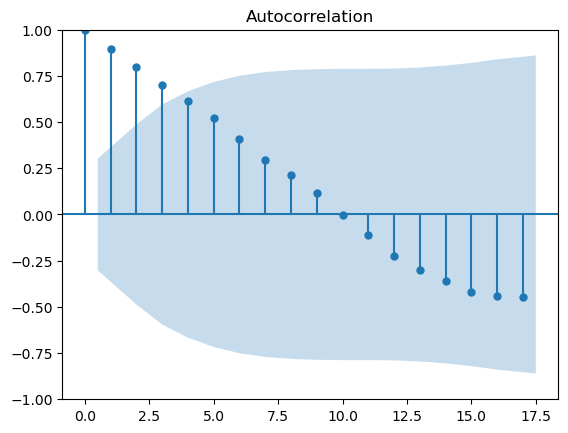

In [17]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

acf_array = acf(train)
print(acf_array)

# Grafico con un nivel de confianza del 95%
plot_acf(train, alpha = 0.05)
plt.show()

In [19]:
from statsmodels.tsa.arima.model import ARIMA
# Fit an AR(1) model to the first simulated data
mod = ARIMA(train, order = (1, 0, 0))
res = mod.fit()

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   42
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -84.310
Date:                Sat, 13 Sep 2025   AIC                            174.621
Time:                        22:03:01   BIC                            179.834
Sample:                             0   HQIC                           176.531
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.5470      5.181     18.635      0.000      86.393     106.701
ar.L1          0.9715      0.032     30.207      0.000       0.908       1.035
sigma2         3.0293      0.673      4.498      0.0

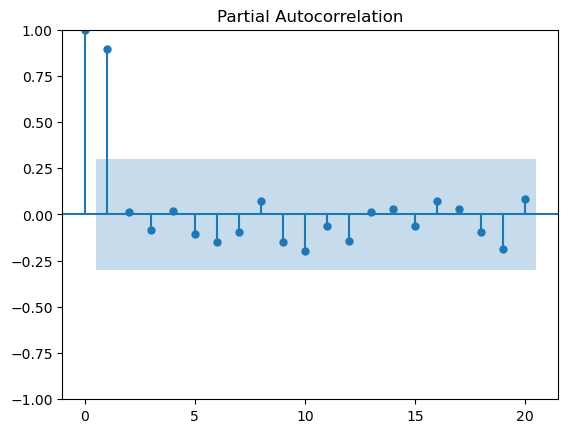

In [34]:
# Determinacion del valor adecuado de la p para AR(1) a partir de la funcion de Autocorrelacion parcial
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train, lags = 20)
plt.show()

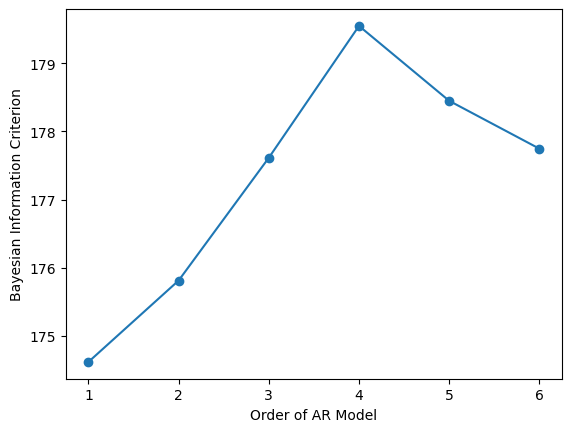

In [27]:
# Determinacion del valor adecuado de p para AR(p) a partir del criterio de informacion Bayesiano
# Fit the data to an AR(p) for p = 0, ..., 6, and save the BIC
AIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(train, order = (p, 0, 0))
    res = mod.fit()
# Save BIC for AR(p)
    AIC[p] = res.aic

# Plot the BIC as a function of p
plt.plot(range(1, 7), AIC[1:7], marker = 'o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

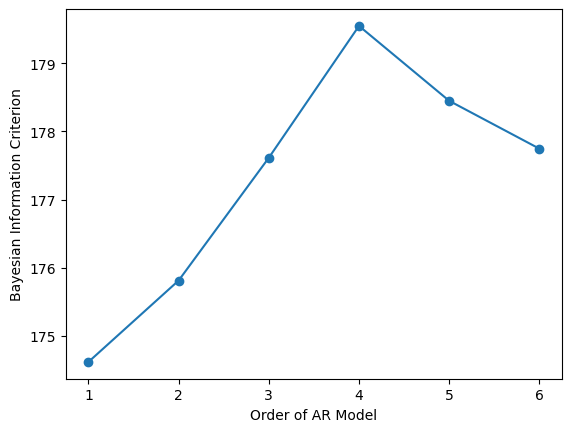

In [29]:
# Determinacion del valor adecuado de p para AR(p) a partir del criterio de informacion Bayesiano
# Fit the data to an AR(p) for p = 0, ..., 6, and save the BIC
AIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(train, order = (p, 0, 0))
    res = mod.fit()
# Save BIC for AR(p)
    AIC[p] = res.aic

# Plot the BIC as a function of p
plt.plot(range(1, 7), AIC[1:7], marker = 'o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

# Conclusion:
De acuerdo con el analisis el mejor estadistico a usar es el de Akaike y el valor de P = 1

En ambos indices se tiene el menor valor para p = 1. Se recomienda utilizar AR(1)

In [70]:
# Les colocamos fecha a los resultados
test = pd.DataFrame(test)
predicciones = pd.DataFrame(predicciones)
test = test.reset_index()
predicciones = predicciones.reset_index()

In [72]:
# Pronostico de los siguientes 30 periodos posteriores al ultimo dato historico
predicciones = res.forecast(len(test)+30)

# Pronostico con intervalo de confianza del 90%
conf = res.get_forecast(len(test) + 30).conf_int(alpha = 0.1)

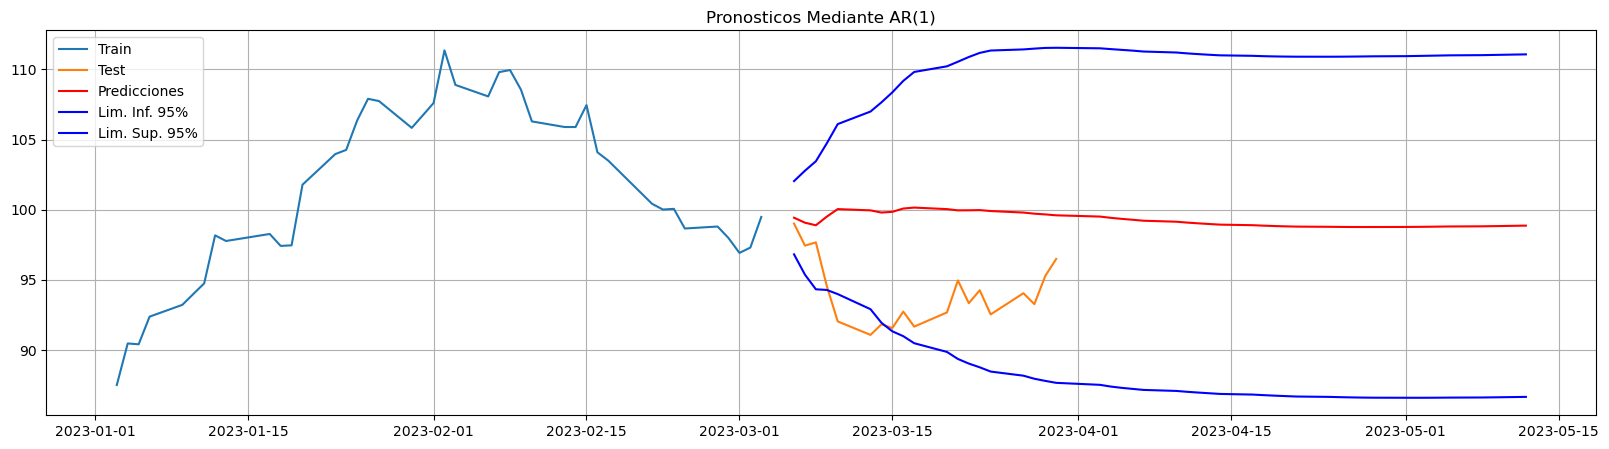

In [74]:
train = pd.DataFrame(train)
lista = test["Date"]
lista = pd.DataFrame(lista)
test.index = test["Date"]
test.drop(columns = ["Date"], inplace = True)

# Pronostico siguientes 30 dias habiles
k = 30
lista2 = []
for day in range(1, 31):
    fecha = ((pd.to_datetime("2023-03-31")+ pd.offsets.BDay(day)).date())
    lista2.append(fecha)
lista2 = pd.DataFrame(lista2, columns = ["Date"])
lista2["Date"] = pd.to_datetime(lista2["Date"])

fechas = pd.concat([lista,lista2])
fechas = fechas.reset_index()

# Quitamos columna de indice
fechas.drop(columns = ["index"], inplace = True)

predicciones = pd.DataFrame(predicciones)
predicciones = predicciones.reset_index()

# Volvemos a eliminar el indice
predicciones.drop(columns = ["index"], inplace = True)

# Concatenamos las fechas con sus respectivas predicciones
frames = [fechas, predicciones]
result = pd.concat(frames, axis = 1, join = 'inner')
result.columns = ['Date', 'Predicciones']

# Dejamos las fechas como indice
result.index = result['Date']
result.drop(columns = ['Date'], inplace = True)

# Intervalos de confiaza
conf = conf.reset_index()
conf.drop(columns = ['index'], inplace = True)

# Le agregamos fecha a los intervalos de confianza
frames = [fechas, conf]
intervalos = pd.concat(frames, axis = 1, join = 'inner')

# Dejamos fecha como indice
intervalos.index = intervalos['Date']
intervalos.drop(columns = ['Date'], inplace = True)

# Graficamos
plt.figure(figsize = (20, 5))
plt.grid()
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(result, label = 'Predicciones', color = 'red')
plt.plot(intervalos['lower Close'], label = 'Lim. Inf. 95%', color = 'blue')
plt.plot(intervalos['upper Close'], label = 'Lim. Sup. 95%', color = 'blue')
plt.legend(loc = 'best')
plt.title('Pronosticos Mediante AR(1)')
plt.show()

In [96]:
predicciones_o = res.forecast(len(test))
predicciones_o = pd.DataFrame(predicciones_o)
predicciones_o = predicciones_o.reset_index()

test_o = pd.DataFrame(test)
test_o = test_o.reset_index()

In [100]:
# Calcular nivel de errore comparando
import numpy as np

acumulador1 = 0
acumulador2 = 0

for contador in range(0, 18):
    acumulador1 = acumulador1 + (test_o.iloc[contador][1] - predicciones_o.iloc[contador][1])** 2
    acumulador2 = acumulador2 + np.abs((test_o.iloc[contador][1] - predicciones_o.iloc[contador][1]) / 
                                        test_o.iloc[contador][1])
mse = acumulador1 / 101
rmse = np.round(np.sqrt(mse), 2)
mape = np.round((acumulador2 / 101) * 100, 2)
print("RMSE =", rmse, "MAPE =", mape, "%")

RMSE = 2.69 MAPE = 1.13 %


# Conclusion:
Podemos concluir que el modelo puede ser confiable, ya que nuestro error promedio es de 1.13% y en unidades es de 2.69 unidades. Por lo que podemos usar el modelo con confianza.